# Pruebas de hipótesis

Una prueba de hipotesis es una regla que especifica si se puede aceptar o rechazar una afirmación acerca de un parametro poblacional (lambda, sigma, mu, etc) dependiendo de la evidencia proporcionada por una muestra de datos (x1,x,2,x3,...,xn)

### Pasos y elementos de una prueba de hipotesis

1. Paramentro a probar
2. a. Hipotesis Nula (siempre de igualdad =)
   b. Hipotesis Alterna (mayor que, menor que o diferente que)
3. Identificar el estimador (Promedio muestral o varianza muestral)
4. Identificar el estadistico y su distribucion (normal, t-student, chi-cuadrada, F-fisher, etc)
5. Valor del estadistico | H0
6. Tolerancia al error alfa, valor critico y criterio de rechazo H0
7. Conclusion de rechazo o no rechazo de H0 con un margen de error de alfa

## Caso de ejemplo

> La empresa Mustage S.A. está desarrollando una plataforma para otorgar credito de bajo monto
> El tiempo para completar exitosamente una consulta de informacion de clientes ante las fuentes de buro no debe ser superior a 30 segudos en promedio
> Muestra de n=50 clientes consultados
> La empresa esta dispuesta a asumir un error del 5%

¿El proveedor de información satisface estadísticamente este requerimiento?

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from scipy.stats import expon
from scipy.stats import uniform
from scipy.stats import norm

In [2]:
muestra = [42, 35, 29, 45, 41, 57, 54, 47, 48, 56, 47, 35, 52, 31, 52, 55, 57, 58, 26, 29, 32, 37, 32, 34, 48, 20, 48, 51, 27, 24, 39, 40, 31, 34, 23, 24, 41, 58, 44, 48, 31, 23, 27, 55, 43, 47, 30, 57, 38, 51]

In [3]:
len(muestra)

50

In [4]:
# Hipotesis

media, var, skew, kurt = expon.stats(scale = 30, moments = 'mvsk')

In [5]:
# Paso 1: Parametro lambda
# Paso 2: Hipoteis

mu = 30
mu > 30

# Paso 3. Mejor estimador
# Estimador
# Paso 4. Distribucion

promedio = np.mean(muestra)
promedio

40.66

In [6]:
# Paso 5
z = (promedio - mu)/np.sqrt(var/50)
z

2.5125860958161983

In [10]:
# Paso 6

alpha = 0.05

# criterios de rechazo
data_norm = norm.rvs(size = 1000000)

Text(0.5, 1.0, 'Distribucion normal')

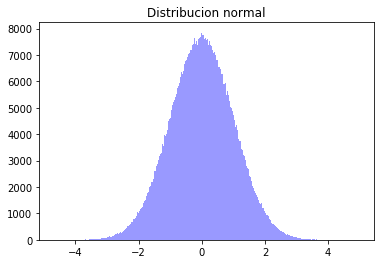

In [13]:
ax = sns.distplot(data_norm, bins = 500, kde = False, color = 'blue')
ax.set_title('Distribucion normal')

In [15]:
valor_critico = norm.ppf(1-alpha, loc = 0, scale = 1)
valor_critico

1.6448536269514722

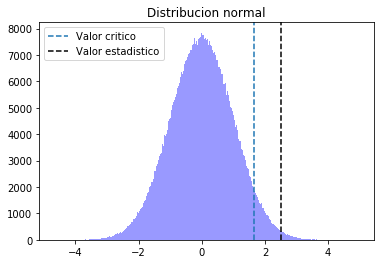

In [18]:
ax = sns.distplot(data_norm, bins = 500, kde = False, color = 'blue')
ax.set_title('Distribucion normal')
ax.axvline(x = valor_critico, linestyle = '--', label = 'Valor critico')
ax.axvline(x = z, linestyle = '--', label = 'Valor estadistico', color = 'k')
ax.legend()

## Errores Estadisticos Tipo 1 y Tipo 2

In [21]:
# 

mu1 = 37
mu2 = 42

promedio = np.mean(muestra)
desv = 2

z_1 = (promedio - mu1)/desv
z_2 = (promedio - mu2)/desv

In [22]:
data1 = norm.rvs(loc = mu1, scale = desv, size = 1000000)
data2 = norm.rvs(loc = mu2, scale = desv, size = 1000000)

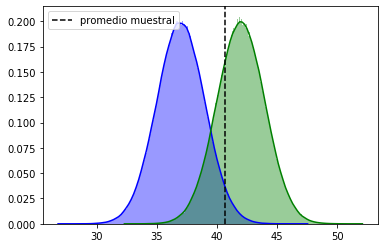

In [24]:
ax = sns.distplot(data1, bins = 500, kde = True, color = 'blue')
ax = sns.distplot(data2, bins = 500, kde = True, color = 'green')
ax.axvline(x = promedio, c = 'k', linestyle = '--', label = 'promedio muestral')
ax.legend()

In [25]:
# Error tipo 1 : p rechazar H0 cuando esta es verdadera

p_prom_mu1 = norm.cdf(z_1)
1 - p_prom_mu1

0.03362496941962845

In [26]:
# Error tipo 2 :  p de no rechazar H0 cuando esta es falsa

p_prom_mu2 = norm.cdf(z_2)
p_prom_mu2

0.2514288950953095

## Intervalos de Confianza
Es un rango de valores, derivado del estadistico de la muestra, que concierto grado de confianza incluye el valor de un parametro poblacional desconocido

1. Parametrod a probar
2. Identificar el estimador
3. identificar el Estadistico
4. Tolerancia al error alfa, estimacion puntual y rango de error
5. Conclusion del intervalo
6. opcional: pruebas de hipotesis usando intervalo de confianza

In [27]:
Muestra = [4046, 2578, 3796, 3412, 3315, 3228, 3666, 3877, 3154, 4062, 4365, 3776, 3761, 2587, 2911, 3184, 3810, 4459, 3385, 3899, 3602, 2701, 2821, 2790, 2557, 2540, 4119, 2712, 2743, 2713, 4466, 3937, 3871, 4427, 3177, 2556, 2903, 3522, 4155, 4010, 4453, 3080, 3008, 3865, 3356, 2799, 3308, 2759, 4347, 2576, 4075, 3333, 2936, 3746, 3334, 3940, 4113, 4220, 3580, 3922]

In [30]:
alpha = 0.05

In [38]:
lim_inf = norm.ppf(alpha/2)
lim_sup = norm.ppf(1-(alpha/2))
lim_inf, lim_sup

(-1.9599639845400545, 1.959963984540054)

In [39]:
promedio = np.mean(Muestra)
desviacion = np.std(Muestra)
len(Muestra)

60

In [40]:
lim_inf = lim_inf*desviacion + promedio
lim_sup = lim_sup*desviacion + promedio
lim_inf, lim_sup

(2306.73126667925, 4638.035399987416)

# Regresión Lineal

La regresión lineal es un modelo, algoritmo o función matemática que aproxima de forma óptima la relación entre una variable Y y una variable X o un set de variables (X1, X2,..., Xk) utilizando la funcion de la recta.

> Funcion de la Recta: Y = aX + b, a : Pendiente, b : Corte con el eje de las ordenadas
>
> Funcion de Regresión: Y = aX + b + error, X y Y v.a.
> a y b son los parámetros poblacionales de la funcion que relaciona a Y y X
> El objetivo de un análisis de regresión es encontrar los mejores estimadores de a y b con el mínimo error

In [27]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [3]:
arc = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)

In [4]:
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [7]:
y = df['salario']
X = df.drop(['salario', 'noasiat','postgrad'], axis = 1)

In [8]:
reg_lin = sm.OLS(y, sm.add_constant(X)).fit()

In [9]:
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           7.37e-38
Time:                        12:50:28   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.2

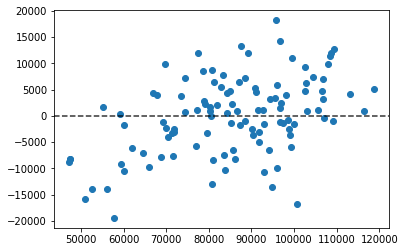

In [10]:
fig, ax = plt.subplots()

y_pred = reg_lin.predict(sm.add_constant(X))

ax.scatter(y, y - y_pred)

plt.axhline(y = 0, color = 'black', alpha = 0.8, linestyle = '--')

# Regresión Logistica
Los modelos de regresión lineal tiene como variable de respuesta (Y) una variable cuantitativa.
¿Qué pasa si la variable de respuesta fuera cualitativa?

Por ejemplo, una variable cualitativa o de naturaleza Bernoulli, Que indique, si una persona compra o no un producto.

> X = 0 : No Comprador, X = 1 : Comprador

Ahora la regresión lineal no se puede aplicar porque al estimar los valores 0 o 1 incurrimos en valores menores a 0 y mayores que 1:


In [11]:
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [12]:
df.salario.describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

In [14]:
y = np.where(df['salario'] > 96000, 1, 0)
X = df.drop(['salario'], axis = 1)
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Text(0, 0.5, 'y')

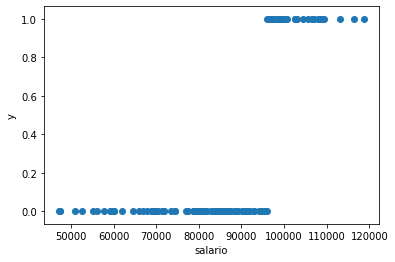

In [15]:
fig, ax = plt.subplots()
ax.scatter(df.salario, y)
ax.set_xlabel('salario')
ax.set_ylabel('y')

In [22]:
reg_log = linear_model.LogisticRegression()
reg_log.fit(X, y)
y_estimado = reg_log.predict(X)

In [25]:
y == y_estimado

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [29]:
metrics.accuracy_score(y, reg_log.predict(X))
X.columns

Index(['noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')